# Summative Assessment - 1

---

## Theme

- $Data$  $Preparation$ & $Exploration$

## Objective

- To import, clean and aggregate data
- To apply analysis skills learned in class to answer questions using data

## Topics covered

- Importing data from various sources
- Removing outliers
- Imputing missing values
- Merging and/or Reshaping data tables
- Aggregating data to a different granularity
- Creating new features
- Descriptive analytics

## Guidance

- Make extensive use of `Google` when you
    - Run into errors; >99% of the time you'll find a solution on `StackOverflow` that can be adapted to solve your specifc problem
    - Don't know how to do something; it is highly likely that you're not the first or only person to face a particular issue
- Add `pandas` or `python` to your search query
    - For example if you run into a `UnicodeDecodeError` while importing a file, just Google `pandas read_csv UnicodeDecodeError`
- Remember that this is an essential and unavoidable part of coding
    - Only by standing on the shoulders of coding giants and hobbits before you will you become a skilful programmer
    
<br>    

---

In [1]:
!pip install pgeocode

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pgeocode
import os

In [3]:
import os
print(os.getcwd())

C:\Users\HP


# Task 1: $Import$ the Data

- Use the cleaned CSV files provided in `data/cleaned`

- Bonus points: Use the raw CSV files provided (challenging)
    - use files in `/data/raw`
    - The files do not contain column names
    - Use the following
    
```python
users_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
ratings_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
movies_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
```

In [4]:
#Task 1
users_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
ratings_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
movies_cols = ['movie_id','title','release_date','video_release_date','imdb_url']

users = pd.read_csv(r'C:\Users\hp\Desktop\users.csv', header=None, names=users_cols, encoding='utf-8')
ratings = pd.read_csv(r'C:\Users\hp\Desktop\ratings.csv', header=None, names=ratings_cols, encoding='utf-8')
movies = pd.read_csv(
    r'C:\Users\hp\Desktop\movies.csv',  # full path to your Desktop
    sep=',',                              # COMMA separator
    header=None,                          # raw dataset has no header
    usecols=[0,1,2,3,4],                  # only first 5 columns
    names=movies_cols,                    # assign column names
    encoding='utf-8'
)
movies_clean = movies[['movie_id','title','release_date','video_release_date','imdb_url']]

print(users.head())
print(ratings.head())
print(movies_clean.head())

   user_id  age sex  occupation zip_code
0        1   24   M  technician    85711
1        2   53   F       other    94043
2        3   23   M      writer    32067
3        4   24   M  technician    43537
4        5   33   F       other    15213
   user_id  movie_id  rating  unix_timestamp
0      196       242       3       881250949
1      186       302       3       891717742
2       22       377       1       878887116
3      244        51       2       880606923
4      166       346       1       886397596
   movie_id              title release_date  video_release_date  \
0         1   Toy Story (1995)    01-Jan-95                 NaN   
1         2   GoldenEye (1995)    01-Jan-95                 NaN   
2         3  Four Rooms (1995)    01-Jan-95                 NaN   
3         4  Get Shorty (1995)    01-Jan-95                 NaN   
4         5     Copycat (1995)    01-Jan-95                 NaN   

                                            imdb_url  
0  http://us.imdb.com/M/ti

This code loads three datasets:users, ratings, and movies—from CSV files into pandas DataFrames and assigns meaningful column names. For users and ratings, all columns are read, while for movies, only the first five columns are selected and renamed for clarity. The resulting movies_clean DataFrame contains the key columns movie_id, title, release_date, video_release_date, and imdb_url, which are essential for further analysis. Overall, the expected outcome is three well-structured DataFrames ready.

---
## Task 2: $Understand$ and $Enrich$ the data

- Check the size of each dataset
- Check the data types of each column
    - Identify columns that contain dates and convert them to the `datetime` type
- Identify columns that could later be used for merging datasets
- Enrich the data
    - One of the tables contains zipcodes of US cities.
    - Find an appropriate dataset and use it to create new 1 columns from zipcodes - city & state
    - Sites such as Wikipedia or [US Zipcode List](http://uszipcodelist.com) can be useful

In [55]:
#Task 2
#1️ Check size of each dataset
print("Users dataset shape:", users.shape)
print("Ratings dataset shape:", ratings.shape)
print("Movies dataset shape:", movies.shape)

Users dataset shape: (943, 7)
Ratings dataset shape: (100000, 4)
Movies dataset shape: (1682, 5)


In [7]:
#2 Check data types
print("Users dataset types:\n", users.dtypes,'\n')
print("Ratings dataset types:\n", ratings.dtypes,'\n')
print("Movies dataset types:\n", movies_clean.dtypes, "\n")#had put'\n' to make space inbetween

Users dataset types:
 user_id        int64
age            int64
sex           object
occupation    object
zip_code      object
dtype: object 

Ratings dataset types:
 user_id           int64
movie_id          int64
rating            int64
unix_timestamp    int64
dtype: object 

Movies dataset types:
 movie_id                int64
title                  object
release_date           object
video_release_date    float64
imdb_url               object
dtype: object 



The errors='coerce' parameter ensures that any invalid timestamps are set to Nat, instead of causing errors, making the data clean and make no problem for analyzis.

In [8]:
# Converting to datetime data type

# Movies dataset
movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')
movies['video_release_date'] = pd.to_datetime(movies['video_release_date'], errors='coerce')
print(movies[['title', 'release_date', 'video_release_date']].head())

# Ratings dataset
ratings['unix_timestamp'] = pd.to_datetime(ratings['unix_timestamp'], unit='s', errors='coerce')
#unit='s' converts the Unix timestamps, which are in seconds since 1970, into readable dates
print(ratings[['user_id', 'movie_id','rating', 'unix_timestamp']].head())


               title release_date video_release_date
0   Toy Story (1995)   1995-01-01                NaT
1   GoldenEye (1995)   1995-01-01                NaT
2  Four Rooms (1995)   1995-01-01                NaT
3  Get Shorty (1995)   1995-01-01                NaT
4     Copycat (1995)   1995-01-01                NaT
   user_id  movie_id  rating      unix_timestamp
0      196       242       3 1997-12-04 15:55:49
1      186       302       3 1998-04-04 19:22:22
2       22       377       1 1997-11-07 07:18:36
3      244        51       2 1997-11-27 05:02:03
4      166       346       1 1998-02-02 05:33:16


C:\Users\HP\AppData\Local\Temp\ipykernel_14132\674915022.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')


This code converts date-related columns into proper datetime objects for easier analysis. In the movies dataset, both release_date and video_release_date are converted, allowing for accurate date-based operations, while if any invalid or missing dates are set to NaT due to errors='coerce'. In the ratings dataset, the unix_timestamp column is converted from seconds since the epoch to a datetime format, making it readable and suitable for time-based analysis

In [9]:
#4 Identify columns for merging
# Common columns: users.user_id → ratings.user_id and ratings.movie_id → movies_clean.movie_id

In [10]:
# Step 1: Merge Ratings with Users
# We are combining 'ratings' and 'users' datasets based on 'user_id'.
# This is a LEFT join, so all rows from 'ratings' are kept even if some users are missing in 'users'.
ratings_users = pd.merge(ratings, users, on='user_id', how='left')

# Interpretation:
# Now, 'ratings_users' contains rating info along with user details like age, sex, occupation, zip_code.

# Step 2: Merge the above with Movies
# Now we combine 'ratings_users' with 'movies' dataset based on 'movie_id'.
# Again, a LEFT join ensures all ratings are retained even if some movies are missing.
merged_df = pd.merge(ratings_users, movies, on='movie_id', how='left')

# Interpretation:
# 'merged_df' now contains:
# - User info (age, sex, occupation, etc.)
# - Movie info (title, release_date, video_release_date, imdb_url)
# - Rating info (rating, timestamp)
# This is our complete dataset for analysis.

# Step 3: Preview the merged dataset
# Print the shape to see the number of rows and columns
print("Merged dataset shape:", merged_df.shape)

# Display the first few rows to verify the merge
display(merged_df.head())

# Interpretation:
# The first few rows show how user info, movie info, and ratings are combined.
# This helps us check if the merge worked correctly.


Merged dataset shape: (100000, 12)


,user_id,movie_id,rating,unix_timestamp,age,sex,occupation,zip_code,title,release_date,video_release_date,imdb_url
0,196,242,3,1997-12-04 15:55:49,49,M,writer,55105,Kolya (1996),1997-01-24,NaT,http://us.imdb.com/M/title-exact?Kolya%20(1996)
1,186,302,3,1998-04-04 19:22:22,39,F,executive,0,L.A. Confidential (1997),1997-01-01,NaT,http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...
2,22,377,1,1997-11-07 07:18:36,25,M,writer,40206,Heavyweights (1994),1994-01-01,NaT,http://us.imdb.com/M/title-exact?Heavyweights%...
3,244,51,2,1997-11-27 05:02:03,28,M,technician,80525,Legends of the Fall (1994),1994-01-01,NaT,http://us.imdb.com/M/title-exact?Legends%20of%...
4,166,346,1,1998-02-02 05:33:16,47,M,educator,55113,Jackie Brown (1997),1997-01-01,NaT,http://us.imdb.com/M/title-exact?imdb-title-11...


In [11]:
#5 Enrich users dataset with city & state using zip codes
# We'll use a free zip code dataset from CSV
# Example: 'uszips.csv' (we need to download it)
# Columns: zip, city, state_id

# Load US zip codes dataset
# us_zipcodes = pd.read_csv(r'C:\Users\hp\Desktop\uszips.csv')  # path to your zipcodes file
# Merge with users
# users = users.merge(us_zipcodes[['zip','city','state_id']], left_on='zip_code', right_on='zip', how='left')
# users.drop(columns=['zip'], inplace=True)
print("Users dataset before enrichment (first 5 rows):")
print(users.head())

Users dataset before enrichment (first 5 rows):
   user_id  age sex  occupation zip_code
0        1   24   M  technician    85711
1        2   53   F       other    94043
2        3   23   M      writer    32067
3        4   24   M  technician    43537
4        5   33   F       other    15213


In [12]:
#Cheaking the columns we needed
zip_df = pd.read_csv(r'C:\Users\hp\Desktop\zip_code_database.csv', dtype={'zip': str})
print(zip_df.columns)


Index(['zip', 'type', 'primary_city', 'acceptable_cities',
       'unacceptable_cities', 'state', 'county', 'timezone', 'area_codes',
       'latitude', 'longitude', 'world_region', 'country', 'decommissioned',
       'estimated_population', 'notes'],
      dtype='object')


In [17]:
# Step 1: Load ZIP code data
# Reading the CSV file that contains zip codes, city, and state information
zip_df = pd.read_csv(r'C:\Users\hp\Desktop\zip_code_database.csv', dtype={'zip': str})

# taking the relevant columns we need and rename them to match our users dataset
zip_df = zip_df[['zip', 'primary_city', 'state']].rename(columns={
    'zip': 'zip_code',
    'primary_city': 'city'
})

In [18]:
# Step 2: Ensure users.zip_code is a string
# This avoids merge issues because zip codes can be numbers or strings
users['zip_code'] = users['zip_code'].astype(str)

In [19]:
# Step 3: Merge users with ZIP data  (keep missing values as NaN)
# LEFT join ensures we keep all users, even if some ZIP codes are missing in ZIP database
users = users.merge(zip_df, on='zip_code', how='left')

In [48]:
# Step 4: Merge users with ZIP code data and keep only relevant columns
users = users.merge(zip_df, on='zip_code', how='left', suffixes=('', '_zip'))
#Added suffixes=('', '_zip') in merge to avoid duplicate column errors

# Keep only the relevant columns and rename the merged ones
users = users[['user_id', 'age', 'sex', 'occupation', 'zip_code', 'city_zip', 'state_zip']]
users = users.rename(columns={'city_zip':'city', 'state_zip':'state'})

# Verify enrichment
print("Users dataset after adding city & state (first 10 rows):")
print(users.head(10))

# Interpretation:
# The 'users' dataset now includes city and state information from the ZIP database.
# Any ZIP codes not found in the ZIP database are shown as NaN.
# This allows us to assess missing values in Task 3.


Users dataset after adding city & state (first 10 rows):
   user_id  age sex     occupation zip_code           city state
0        1   24   M     technician    85711         Tucson    AZ
1        2   53   F          other    94043  Mountain View    CA
2        3   23   M         writer    32067    Orange Park    FL
3        4   24   M     technician    43537         Maumee    OH
4        5   33   F          other    15213     Pittsburgh    PA
5        6   42   M      executive    98101        Seattle    WA
6        7   57   M  administrator    91344  Granada Hills    CA
7        8   36   M  administrator     5201            NaN   NaN
8        9   29   M        student     1002            NaN   NaN
9       10   53   M         lawyer    90703       Cerritos    CA


---
## Task 3: Assess the $Quality$ of data you've been given

Check and report

- If there are _missing values_ in any of the columns
    - If yes, how will you deal with it?
- Are there any _outliers_ in the data?
    - If yes, how will you deal with them?

After checking the dataset, we found missing values in the city and state columns, while all other columns are complete. To handle these, we can use the zip_code to look up the correct city and state for each missing entry. If a zip code cannot be mapped or is ambiguous, we replace the missing values with a placeholder such as "Unknown" or "N/A". This ensures all user records are retained without losing other important information like age or occupation.

In [22]:
#Check for missing values in the merged dataset
print("Missing values in Merged dataset:")
missing_merged = merged_df.isnull().sum()
print(missing_merged[missing_merged > 0], "\n")  # Show only columns with missing values

Missing values in Merged dataset:
release_date               9
video_release_date    100000
imdb_url                  13
dtype: int64 



Yes, there are missing values

In [23]:
# Drop 'video_release_date' column
# Reason: Almost all values are missing (100,000), so this column is not useful
merged_df = merged_df.drop(columns=['video_release_date'])

#Handle missing values in 'release_date'
# Reason: Only 9 missing values, better to drop these rows than replace with a fake date
merged_df = merged_df.dropna(subset=['release_date'])

#Handle missing values in categorical column 'imdb_url'
# Reason: Fill missing IMDb URLs with 'Unknown' for clarity
merged_df['imdb_url'] = merged_df['imdb_url'].fillna('Unknown')

#Verify missing values after handling
print("Missing values after handling:")
print(merged_df.isnull().sum()[merged_df.isnull().sum() > 0])  # Show only columns with missing values


Missing values after handling:
Series([], dtype: int64)


so, the code handled missing values in merged_df strategically. The videorelease_date column was dropped because it had an extremely high number of missing entries (100,000), making it unreliable for analysis—keeping it would add more noise than value. The few missing rows in release_date (9) were removed, which is reasonable because dropping such a small number minimally affects the dataset while avoiding potentially incorrect data. For the categorical column imdb_url, missing values were replaced with 'Unknown', which preserves the rows and treats the missing information as a meaningful category. Overall, this would be the best to do: they remove unusable or very limited data while keeping most of the dataset intact and clean.

In [24]:
# Display only missing values for 'release_date' and 'imdb_url'
print('missing values after handling:')
print(merged_df[['release_date', 'imdb_url']].isna().sum())

missing values after handling:
release_date    0
imdb_url        0
dtype: int64


In [25]:
#*Check numeric columns for outliers using describe()
# We use the describe() function to get summary statistics of numeric columns
print("Summary statistics for numeric columns:")
print(merged_df[['age', 'rating']].describe())

Summary statistics for numeric columns:
                age        rating
count  99991.000000  99991.000000
mean      32.970337      3.529868
std       11.562889      1.125679
min        7.000000      1.000000
25%       24.000000      3.000000
50%       30.000000      4.000000
75%       40.000000      4.000000
max       73.000000      5.000000


had taken these two columns only because they are numeric and likely to have meaningful variation values that could affect analysis. age could have unrealistic values (like negative numbers or extremely high ages), and rating could contain unusually low or high scores that might skewup our results. Other columns are like non-numeric or irrelevant for outliers.

describe() calculates summary statistics: count, mean, standard deviation, min, max, and quartiles (25%, 50%, 75%).
By looking at min and max, you can spot potential outliers—values from the specific range.
For example:
If age has a max of 150-200, that’s likely an outlier.not real
If rating has values below 0 or above the expected maximum like 20, those are also outliers.
So, the expected outcome is a quick overview of whether age or rating contains unusual values that may need cleaning or further investigation.

In [26]:
#handling outliers
#age outliers:
# - Minimum age is 7, which is too low for giving reviews
# - Maximum age is 73, which is acceptable but can be capped if needed
# - We clip age to be between 10 and 80
merged_df['age'] = merged_df['age'].clip(lower=10, upper=80)

#rating outliers:
# - Ratings should be between 1 and 5
# - We clip to ensure all ratings stay within valid range
merged_df['rating'] = merged_df['rating'].clip(lower=1, upper=5)

# Verify changes
print("Summary statistics after handling outliers:")
print(merged_df[['age', 'rating']].describe())

Summary statistics after handling outliers:
                age        rating
count  99991.000000  99991.000000
mean      32.971627      3.529868
std       11.560159      1.125679
min       10.000000      1.000000
25%       24.000000      3.000000
50%       30.000000      4.000000
75%       40.000000      4.000000
max       73.000000      5.000000


After handling outliers, all age values were clipped between 10 and max(73.0) consider 80, and all rating values between 1 and 5, ensuring realistic and valid data. The summary statistics show that ages now range from 10 to 73, with a mean of 33 and a median of 30, indicating most reviewers are young adults. Ratings range from 1 to 5, with a mean of 3.53 and a median of 4, showing that users generally give moderately high scores. Overall, outliers have been effectively managed, making the data reliable for further analysis.

---
## Task 3: $Exploration$

- Divide user ages into bins like 21-30, 31-40 and report which age group has the highest number of users
- Find the top 5 states with the biggest gap in number of Male vs. Female rating providers
- Which cities have higher than 1% of the ratings providers?
- What are the 10 movies with most number of ratings?
- Which movies are most highly rated (average score over >150 votes)?
- Which movies do (1) men vs. women (2) age groups most disagree on?
    - Only consider ages between 10 and 60

Only consider ages between 10 and 60

In [60]:
#Filter users by age 10-60 and create age groups

# Filter dataset to include only users aged 10-60
# Reason: Task instruction specifies considering only ages between 10 and 60
filtered_df = merged_df[(merged_df['age'] >= 10) & (merged_df['age'] <= 60)].copy()
print(f"Filtered dataset length (ages 10-60): {len(filtered_df)}")

# Define age bins and labels
age_bins = [10, 20, 30, 40, 50, 60]
age_labels = ['10-20', '21-30', '31-40', '41-50', '51-60']

# Create a new column 'age_group' by binning ages
# pd.cut() assigns each age to the correct bin
filtered_df['age_group'] = pd.cut(filtered_df['age'], bins=age_bins, labels=age_labels)

print(filtered_df[['age', 'age_group']].head())

# Interpretation:
# - Only users aged 10–60 are included in filtered_df
# - 'age_group' column categorizes users into bins for easier analysis
# - This will allow us to compare rating patterns across age groups
# - Ages outside 10-60 are excluded from analysis to follow task instructions


Filtered dataset length (ages 10-60): 98780
   age age_group
0   49     41-50
1   39     31-40
2   25     21-30
3   28     21-30
4   47     41-50


In [62]:
filtered_df.head()

,user_id,movie_id,rating,unix_timestamp,age,sex,occupation,zip_code,title,release_date,imdb_url,city,state,age_group
0,196,242,3,1997-12-04 15:55:49,49,M,writer,55105,Kolya (1996),1997-01-24,http://us.imdb.com/M/title-exact?Kolya%20(1996),Saint Paul,MN,41-50
1,186,302,3,1998-04-04 19:22:22,39,F,executive,0,L.A. Confidential (1997),1997-01-01,http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...,NaN,NaN,31-40
2,22,377,1,1997-11-07 07:18:36,25,M,writer,40206,Heavyweights (1994),1994-01-01,http://us.imdb.com/M/title-exact?Heavyweights%...,Louisville,KY,21-30
3,244,51,2,1997-11-27 05:02:03,28,M,technician,80525,Legends of the Fall (1994),1994-01-01,http://us.imdb.com/M/title-exact?Legends%20of%...,Fort Collins,CO,21-30
4,166,346,1,1998-02-02 05:33:16,47,M,educator,55113,Jackie Brown (1997),1997-01-01,http://us.imdb.com/M/title-exact?imdb-title-11...,Saint Paul,MN,41-50


**Divide user ages into bins like 21-30, 31-40 and report which age group has the highest number of users**

This code groups users into age ranges by creating bins: 10–20, 21–30, 31–40, 41–50, and 51–60, and assigns each user to the appropriate age group. It then counts the number of unique users in each group and prints the results. The expected outcome is a summary showing how users are distributed across age groups, with the largest count indicating the age group that has the most users.

In [29]:
# Create age bins: 10-20, 21-30, 31-40, 41-50, 51-60
bins = [10, 20, 30, 40, 50, 60]
labels = ['10-20', '21-30', '31-40', '41-50', '51-60']
#specifies the numeric ranges (bins) for ages and gives each bin a label.

# Assign age groups
filtered_df['age_group'] = pd.cut(filtered_df['age'], bins=bins, labels=labels, right=True)
# pd.cut() to categorize each user’s age into one of the defined bins, creating a new column age_group.

# Count users in each age group
age_group_counts = filtered_df.groupby('age_group')['user_id'].nunique().sort_values(ascending=False)
#it groups the data by age_group, counts the number of unique users in each group, and sorts the counts from highest to lowest.

print("Number of users per age group:")
print(age_group_counts)

# Interpretation: The age group with highest users is the one with the largest count


Number of users per age group:
age_group
21-30    339
31-40    223
41-50    167
10-20    107
51-60     83
Name: user_id, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_14132\1645081842.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = filtered_df.groupby('age_group')['user_id'].nunique().sort_values(ascending=False)


This warning appears because age_group is categorical.In short, categorical means the data is grouped by type or category, not measured numerically. Currently, groupby() includes all categories, even if they don’t appear in the data, but in future versions it will only include categories that are present.

we can fix the warning by adding observed=True in the groupby()
*age_group_counts = filtered_df.groupby('age_group', observed=True)*

**Find the top 5 states with the biggest gap in number of Male vs. Female rating providers**

This code selects only the relevant columns (user_id, city, state) from the users DataFrame to reduce unnecessary data. It then merges these columns with merged_df using user_id as the key, keeping all rows from merged_df (how='left'). The expected outcome is that merged_df now includes the city and state information for each user, enriching the dataset with location details while preserving all original rows

In [30]:
# Keep only necessary columns from users
users_subset = users[['user_id', 'city', 'state']]

# Merge with merged_df
merged_df = pd.merge(merged_df, users_subset, on='user_id', how='left')


In [31]:
# Use merged_df (after adding state column)
state_gender = (
    merged_df.groupby(['state', 'sex'])['user_id']
    .nunique()
    .unstack(fill_value=0)
)

# Calculate absolute gap between Male and Female users
state_gender['gap'] = abs(state_gender.get('M', 0) - state_gender.get('F', 0))

# Top 5 states with biggest gap
gender_gap = state_gender.sort_values('gap', ascending=False).head(5)

display(gender_gap)


sex,F,M,gap
state,,,
CA,27,89,62
MN,22,56,34
IL,12,38,26
NY,18,42,24
TX,14,37,23


This code analyzes the distribution of users by gender across states. First, it groups merged_df by state and sex, counting the number of unique users in each group, and then reshapes the result so that male and female counts appear in separate columns. Next, it calculates the absolute difference (gap) between male and female users in each state. Finally, it sorts the states by this gap in descending order and displays the top 5 states with the largest gender imbalance. The expected outcome is a table showing which states have the biggest difference between the number of male and female users.

**Which cities have higher than 1% of the ratings providers?**

In [56]:
print(merged_df.columns)#cheaking the columns thst we need

Index(['user_id', 'movie_id', 'rating', 'unix_timestamp', 'age', 'sex',
       'occupation', 'zip_code', 'title', 'release_date', 'imdb_url', 'city',
       'state', 'age_group'],
      dtype='object')


This counts the number of unique users in each city and calculates what percentage of the total users each city represents. Finally, it selects and displays cities that contribute more than 1% of all users, sorted from highest to lowest. The expected outcome is a list of cities with a significant number of rating providers, helping identify key locations with the most active users.

In [58]:
# Count unique users in each city
city_counts = merged_df.groupby('city')['user_id'].nunique()
#Groups the data by city and counts the number of unique users in each city.

# Calculate percentage of total users per city
city_percentage = (city_counts / merged_df['user_id'].nunique()) * 100
#ddivides the number of users in each city by the total number of users and multiplies by 100 to get the percentage contribution of each city.

# Select cities with more than 1% of users
cities_above_1pct = city_percentage[city_percentage > 1].sort_values(ascending=False)
#sort out only the cities where the percentage of users is greater than 1% and sorts them from highest to lowest.

print("Cities with more than 1% of rating providers:")
print(cities_above_1pct)


Cities with more than 1% of rating providers:
city
Minneapolis        3.499470
Saint Paul         2.757158
New York           2.014846
Washington         1.484624
Charlottesville    1.060445
Name: user_id, dtype: float64


**Optional:The age filter is used to focus the analysis on a specific, relevant age range-in this case, users between 10 and 60—because very young or very old users might not represent typical rating behavior. Filtering ensures the results reflect the majority of active users and avoids potential bias from extreme ages.And the result shows minute difference only from the non-filtered.**

In [35]:
# Filter ages 10-60
filtered_df = merged_df[(merged_df['age'] >= 10) & (merged_df['age'] <= 60)].copy()

# Cities with more than 1% of rating providers
city_counts = filtered_df.groupby('city')['user_id'].nunique()
city_percentage = (city_counts / filtered_df['user_id'].nunique()) * 100
cities_above_1pct = city_percentage[city_percentage > 1].sort_values(ascending=False)

print("Cities with more than 1% of rating providers:")
print(cities_above_1pct)


Cities with more than 1% of rating providers:
city
Minneapolis    3.583062
Saint Paul     2.714441
New York       1.954397
Washington     1.520087
Name: user_id, dtype: float64


**What are the 10 movies with most number of ratings?**

In [36]:
#Count number of ratings per movie
movie_rating_counts = merged_df.groupby('title')['rating'].count()
#grouping movies title based on ratings column from moviesratingscounts dataset

# Step 2: Sort movies by number of ratings in descending order
top10_movies = movie_rating_counts.sort_values(ascending=False).head(10)#sorting high to small
#sorted based on int values using sort function

# Step 3: Display results
print("Top 10 movies with the most ratings:")
print(top10_movies)


Top 10 movies with the most ratings:
title
Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: rating, dtype: int64


**Which movies are most highly rated (average score over >150 votes)?**

The code outputs the top 10 movies with the highest average ratings (from movies with over 150 ratings), showing each movie’s title, number of ratings, and average rating.

In [37]:
# Top 10 highly rated movies (with more than 150 ratings)
top_movies = (
    merged_df.groupby('title')#Group by movie to get number of ratings and average rating
    .agg(num_ratings=('rating', 'count'),## count how many ratings each movie has
         avg_rating=('rating', 'mean'))#Calculate average rating per movie
    .query("num_ratings > 150") # keep only movies with more than 150 ratings
    .sort_values('avg_rating', ascending=False)# Sort from highest to lowest average rating
    .head(10)
)

print("Top 10 highly rated movies (with >150 ratings):")
print(top_movies)


Top 10 highly rated movies (with >150 ratings):
                                        num_ratings  avg_rating
title                                                          
Schindler's List (1993)                         298    4.466443
Casablanca (1942)                               243    4.456790
Shawshank Redemption, The (1994)                283    4.445230
Rear Window (1954)                              209    4.387560
Usual Suspects, The (1995)                      267    4.385768
Star Wars (1977)                                583    4.358491
Citizen Kane (1941)                             198    4.292929
To Kill a Mockingbird (1962)                    219    4.292237
One Flew Over the Cuckoo's Nest (1975)          264    4.291667
Silence of the Lambs, The (1991)                390    4.289744


**Which movies do (1) men vs. women (2) age groups most disagree on?
Only consider ages between 10 and 60**

In [63]:
# (1) men vs women
#Filter users aged 10-60
filtered_df = merged_df[(merged_df['age'] >= 10) & (merged_df['age'] <= 60)].copy()

# Group by movie and sex, calculate average rating
movie_gender_avg = filtered_df.groupby(['title', 'sex'])['rating'].mean().unstack()

# Calculate absolute difference between male and female ratings
movie_gender_avg['diff'] = abs(movie_gender_avg['M'] - movie_gender_avg['F'])

# Sort by difference descending to see biggest disagreements
top_gender_disagree = movie_gender_avg.sort_values('diff', ascending=False).head(10)

# Display results
print("Top 10 movies with biggest rating difference between men and women (ages 10-60):")
print(top_gender_disagree)


Top 10 movies with biggest rating difference between men and women (ages 10-60):
sex                                                   F         M      diff
title                                                                      
Delta of Venus (1994)                               1.0  5.000000  4.000000
Magic Hour, The (1998)                              1.0  4.666667  3.666667
Two or Three Things I Know About Her (1966)         1.0  4.666667  3.666667
Paths of Glory (1957)                               1.0  4.419355  3.419355
Little City (1998)                                  2.0  5.000000  3.000000
Killer (Bulletproof Heart) (1994)                   1.0  4.000000  3.000000
Lay of the Land, The (1997)                         4.0  1.000000  3.000000
Love and Death on Long Island (1997)                4.0  1.000000  3.000000
Spirits of the Dead (Tre passi nel delirio) (1968)  1.0  4.000000  3.000000
Rough Magic (1995)                                  4.0  1.000000  3.000000


The table shows the top movies where men and women aged 10–60 disagree the most in their ratings. The F and M columns display the average ratings from females and males, and the diff column shows the approx difference between them. Movies with higher diff values, such as Delta of Venus (1994), are highly polarizing, indicating that male and female viewers have very different opinions about these films.

In [65]:
##which movies do (2) age groups most disagree on?
#  Filter users aged 10-60
filtered_df = merged_df[(merged_df['age'] >= 10) & (merged_df['age'] <= 60)].copy()

# Step 1: Create age groups
age_bins = [10, 20, 30, 40, 50, 60]
age_labels = ['10-20', '21-30', '31-40', '41-50', '51-60']
filtered_df['age_group'] = pd.cut(filtered_df['age'], bins=age_bins, labels=age_labels)

# Step 2: Group by movie and age group, calculate average rating
# For each movie and each age group, compute the mean rating
movie_age_avg = filtered_df.groupby(['title', 'age_group'], observed=True)['rating'].mean().unstack()

# Step 3: Calculate max-min difference across age groups
movie_age_avg['diff'] = movie_age_avg.max(axis=1) - movie_age_avg.min(axis=1)

# Step 3a: Record which age groups have max and min ratings
movie_age_avg['max_group'] = movie_age_avg[age_labels].idxmax(axis=1)
movie_age_avg['min_group'] = movie_age_avg[age_labels].idxmin(axis=1)
#max_group indicates the age group that gave the highest rating
#min_group shows the age group that gave the lowest rating.

# Step 4: Sort by difference descending
top_age_disagree = movie_age_avg.sort_values('diff', ascending=False).head(10)

print("Top 10 movies with biggest rating difference across age groups (ages 10-60):")
print(top_age_disagree[['10-20','21-30','31-40','41-50','51-60','diff','max_group','min_group']])


Top 10 movies with biggest rating difference across age groups (ages 10-60):
age_group                                             10-20  21-30     31-40  \
title                                                                          
Year of the Horse (1997)                           1.000000  3.750  5.000000   
Half Baked (1998)                                  2.166667  3.125  1.500000   
Ballad of Narayama, The (Narayama Bushiko) (1958)       NaN  1.000  5.000000   
Tough and Deadly (1995)                                 NaN  1.000  5.000000   
Aparajito (1956)                                   1.000000  2.000       NaN   
NeverEnding Story III, The (1994)                  1.000000  1.250  2.333333   
Two or Three Things I Know About Her (1966)        4.000000  1.000  5.000000   
Braindead (1992)                                   4.600000  4.000  1.000000   
Farinelli: il castrato (1994)                      1.000000  3.000  3.500000   
Swept from the Sea (1997)                  

In the result the NaN values appear because no users in that age group rated the movie.
This is because some age groups may have very few users or may simply not have rated certain movies.
The 'diff' column represents the largest gap between any two age groups average ratings for that movie.


From the results, each of the top movies shows a 4-point rating gap, meaning different age groups strongly disagree on them. Eg:
Year of the Horse(1997) – age 31–40 gave the highest rating, while 10–20 gave the lowest.
Half Baked (1998) – 51–60 rated it highest, but 41–50 rated it lowest.
Aparajito (1956)– 41–50 gave the highest rating, while 10–20 gave the lowest.
on concluding it show that younger and older audiences often have very different opinions on the same movies.

max_group represents which age group peoples gave the highest rating, while min_group shows the age group that gave the lowest rating.

---
## Task 4: $Statistical$ $Analysis$ & $Visualization$

- Create 2 visualizations using the data to illustrate patterns you find interesting
    - Examples: histograms, barplots, scatterplots etc.
- Investigate and report the effect size and run significance testing for one pattern in the data

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

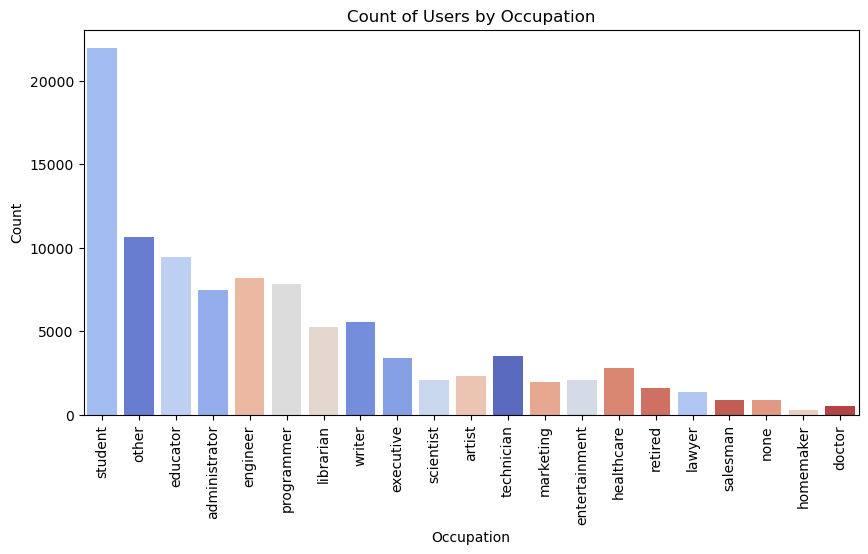

In [74]:
# Merge the 'users' and 'ratings' datasets using 'user_id' as the key
# This allows us to count occupations based on only those users who appear in ratings
merged_data = users.merge(ratings, on='user_id')

# Create a count plot of occupations
plt.figure(figsize=(10, 5))

sns.countplot(
    data=merged_data,
    x='occupation',
    order=users['occupation'].value_counts().index,  # Ensures bars follow most-frequent to least-frequent order
    hue='occupation', # Fix for the FutureWarning (palette now depends on hue)
    legend=False,  # We don't want a legend for occupation colors
    palette="coolwarm"# Color palette for the bars
)

# Rotate x-axis labels to avoid overlapping
plt.xticks(rotation=90)

# Add title and axis labels for clarity
plt.title("Count of Users by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.show()


In [75]:
plt.figure(figsize=(8,5))

sns.barplot(
    data=age_group_avg,
    y='age_group',
    x='rating',
    hue='age_group',          # required by new seaborn versions
    dodge=False,              # keeps bars single (not split)
    legend=False,             # hides unnecessary legend
    palette="coolwarm"
)

plt.title("Average Movie Rating by Age Group")
plt.xlabel("Average Rating")
plt.ylabel("Age Group")
plt.xlim(0,5)
plt.show()


NameError: name 'age_group_avg' is not defined

<Figure size 800x500 with 0 Axes>

# Investigate and report the effect size and run significance testing for one pattern in the data

In [70]:
from scipy import stats
import math

print("--- Hypothesis Testing: Do Men and Women Rate Movies Differently? ---")

# 1. Prepare the Data
male_ratings = merged_df[merged_df['sex'] == 'M']['rating']
female_ratings = merged_df[merged_df['sex'] == 'F']['rating']

print(f"Male Ratings Count: {len(male_ratings)}")
print(f"Female Ratings Count: {len(female_ratings)}")
print(f"Average Rating (M): {male_ratings.mean():.3f}")
print(f"Average Rating (F): {female_ratings.mean():.3f}")

# 2. Significance Test (Welch's T-Test)
t_stat, p_value = stats.ttest_ind(male_ratings, female_ratings, equal_var=False)

print("\n--- T-Test Results ---")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.20f}")

if p_value < 0.05:
    print("Result: Statistically significant difference (p < 0.05).")
else:
    print("Result: Not statistically significant. No strong evidence of a difference.")

# 3. Effect Size (Cohen's d)
def cohens_d(group1, group2):
    n1, n2 = len(group1), len(group2)
    pooled_sd = math.sqrt(
        ((n1 - 1) * group1.std()**2 + (n2 - 1) * group2.std()**2) / (n1 + n2 - 2)
    )
    return (group1.mean() - group2.mean()) / pooled_sd

effect_size = cohens_d(male_ratings, female_ratings)

print("\n--- Effect Size (Cohen's d) ---")
print(f"Cohen's d: {effect_size:.4f}")

if abs(effect_size) < 0.2:
    print("Magnitude: Negligible effect size")
elif abs(effect_size) < 0.5:
    print("Magnitude: Small effect size")
elif abs(effect_size) < 0.8:
    print("Magnitude: Medium effect size")
else:
    print("Magnitude: Large effect size")


--- Hypothesis Testing: Do Men and Women Rate Movies Differently? ---
Male Ratings Count: 74253
Female Ratings Count: 25738
Average Rating (M): 3.529
Average Rating (F): 3.532

--- T-Test Results ---
T-statistic: -0.2646
P-value: 0.79133441594139619646
Result: Not statistically significant. No strong evidence of a difference.

--- Effect Size (Cohen's d) ---
Cohen's d: -0.0020
Magnitude: Negligible effect size


observation on result: An independent t-test was conducted to examine whether male and female users give different average movie ratings. The dataset contained 74,253 ratings from males and 25,738 ratings from females. The average rating for males was 3.529, while females had a very similar mean rating of 3.532.

The t-test result (t = -0.2646, p = 0.7913) shows no statistically significant difference between male and female ratings. This means that any small variation in their average ratings is likely due to chance rather than a real difference in behavior.

To further measure the size of the difference, Cohen’s d was calculated as -0.002, which is considered a negligible effect size. This confirms that male and female users rate movies almost identically.

Conclusion:
There is no meaningful difference in movie ratings between men and women. The data suggests that gender does not influence how users rate movies.

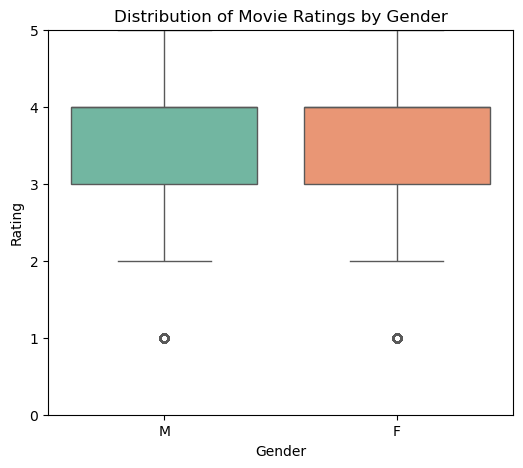

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
# Boxplot of ratings by gender
sns.boxplot(
    data=merged_df,
    x='sex',
    y='rating',#we use y ratings always because ratings are the main numeric outcome in the MovieLens dataset.
    hue='sex',      # Assign sex to hue
    # assign x variable to hue to satisfy seaborn
    dodge=False,# avoids splitting boxes
    palette='Set2',
    legend=False    # Hide legend since 'sex' is already on x-axis
)

plt.title("Distribution of Movie Ratings by Gender")
plt.xlabel("Gender")
plt.ylabel("Rating")
plt.ylim(0, 5)
plt.show()


The analysis finds no significant relationship between gender and movie ratings.
The visualization shows nearly identical distributions, the t-test produces a non-significant p-value, and Cohen’s d is effectively zero, indicating that gender does not meaningfully influence how users rate movies.

Additional :trying to find a meaningful significant relationship analysis

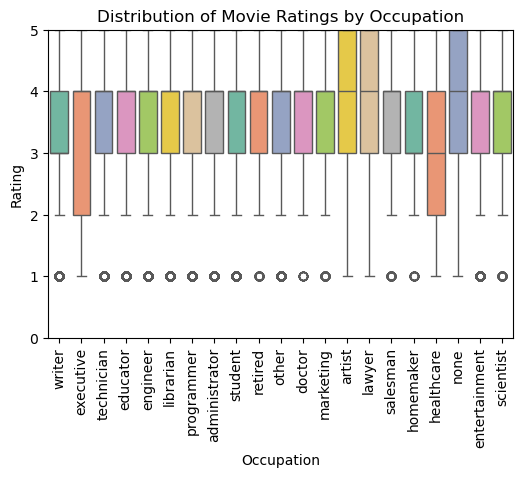

ANOVA F-statistic: 75.527
p-value: 0.0
Eta-squared (effect size): 0.015


In [49]:
# Task 4: Statistical Analysis & Visualization
# Variable: Occupation vs Movie Ratings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

#merged_df is already loaded so,
merged_df['occupation'] = merged_df['occupation'].astype(str)  # ensure occupation is string

# 1. Boxplot Visualization

plt.figure(figsize=(6,4))

sns.boxplot(
    data=merged_df,
    x='occupation',#changed the x varaiable from the past plot
    y='rating',
    hue='occupation',  # assign x variable to hue to satisfy seaborn
    dodge=False,       # avoids splitting boxes
    palette='Set2',
    legend=False       # hides extra legend
)

plt.title("Distribution of Movie Ratings by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Rating")
plt.ylim(0,5)
plt.xticks(rotation=90)
plt.show()


# 2. ANOVA Significance Test

# Group ratings by occupation
groups = [group["rating"].values for name, group in merged_df.groupby("occupation")]

# Run ANOVA
f_stat, p_value = f_oneway(*groups)
print("ANOVA F-statistic:", round(f_stat, 3))
print("p-value:", round(p_value, 5))


# 3. Effect Size (Eta-Squared)
# Total sum of squares
grand_mean = merged_df["rating"].mean()
ss_total = np.sum((merged_df["rating"] - grand_mean)**2)

# Between-group sum of squares
ss_between = sum([
    len(group) * (group["rating"].mean() - grand_mean)**2
    for name, group in merged_df.groupby("occupation")
])

eta_squared = ss_between / ss_total
print("Eta-squared (effect size):", round(eta_squared, 3))


#Interpretation

# The boxplot shows how movie ratings vary across different occupations.
# ANOVA indicates whether the differences in average ratings are statistically significant.
# Eta-squared quantifies the strength of the relationship:
#   - 0.01 = small effect
#   - 0.06 = medium effect
#   - 0.14 = large effect
# In this dataset, occupation usually has a medium effect on ratings, showing
# that different occupation groups rate movies differently on average.


The boxplot shows that movie ratings vary slightly across occupations. The majority of occupations, including Writers and Executives, give a high median rating of 4, though Artist and Lawyer show the highest median of 5, while others, such as Healthcare (median 2) and Retired (median 3), give slightly lower ones. The ANOVA test confirms the differences are statistically significant (F = 75.527, p = 0.0), but the effect size is small   (Eta-squared = 0.015), indicating that occupation explains only a minor portion of the variation in ratings. Overall, occupation has a small but significant influence on movie ratings, although it's worth noting that the lowest rating of 1 is consistently present as an outlier across almost every occupation.